In [374]:
from __future__ import division

from sqlalchemy import create_engine
import pyodbc
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
import json
import pickle
import requests
import time
import random
import seaborn as sns
import ml_insights as mli

%matplotlib inline

In [327]:
# load search results saved from the redlist website
amniotes = pd.read_csv('amniotes.csv')
species_list=amniotes.iloc[:,0].values

In [17]:
# get relevant information for each species from the search result
redlist_data = []
category_dict = {'LC': 0, 'LR/LC': 0, 'VU': 1, 'NT': 1, 'LR/NT': 1, 'EN': 2, 'CR': 2, 'EX': 3, 'EW': 3}
species_url = 'http://apiv3.iucnredlist.org/api/v3/species/id/{}?{}'
# text_url = 'http://apiv3.iucnredlist.org/api/v3/species/narrative/id/{}?{}'
habitat_url = 'http://apiv3.iucnredlist.org/api/v3/habitats/species/id/{}?{}'
historical_url = 'http://apiv3.iucnredlist.org/api/v3/species/history/id/{}?{}'
token = 'token=42d30363ec8f30a46ba8b05998800e5f8b33ea88c3f2f9c9ee0ebbb3c8cfe205'
headers = ['curr_code', 'species_id', 'curr_year', 'history_code', 'history_year', 'habitat', 'taxon_class', 'curr_category', 'history_category']

counter =18700

for species_id in species_list[18700:]:
    this_url = historical_url.format(species_id,token)
    resp = requests.get(this_url)
    resp_obj = json.loads(resp.content)
    
    #IUCN code and year
    try:
        history_code = resp_obj['result'][1]['code']
        history_year = resp_obj['result'][1]['year']
        history_code_category = category_dict[history_code.upper()]

    except:
        history_code = np.nan
        history_year = np.nan
        history_code_category = np.nan
        
    curr_code = resp_obj['result'][0]['code']
    curr_year = resp_obj['result'][0]['year']
    curr_code_category = category_dict[curr_code.upper()]
    
    time.sleep(random.uniform(0.1, 0.5))
    
    this_url = habitat_url.format(species_id,token)
    resp = requests.get(this_url)
    resp_obj = json.loads(resp.content)
    
    habitat = []
    for i in resp_obj['result']:
        habitat.append(int((i['code'][0])))
    habitat=np.unique(habitat)
    
    time.sleep(random.uniform(0.1, 0.5))
    
    this_url = species_url.format(species_id,token)
    resp = requests.get(this_url)
    resp_obj = json.loads(resp.content)
    taxon_class = resp_obj['result'][0]['class']

    
    
    movie_dict = dict(zip(headers, [curr_code,
                                    species_id,
                                    curr_year,
                                    history_code,
                                    history_year,
                                    habitat,
                                    taxon_class,
                                    curr_code_category,
                                    history_code_category]))


    
    
    print(counter, movie_dict)
    redlist_data.append(movie_dict)
    counter += 1
    if counter % 100 == 0:
        pickle.dump(redlist_data, open( "redlistapi5.p", "wb+" ))
       
    time.sleep(random.uniform(0.1, 0.6))

(18700, {'species_id': 103840832, 'curr_category': 0, 'habitat': array([1]), 'history_year': nan, 'history_category': nan, 'taxon_class': u'AVES', 'history_code': nan, 'curr_year': u'2016', 'curr_code': u'LC'})
(18701, {'species_id': 103842251, 'curr_category': 2, 'habitat': array([1]), 'history_year': nan, 'history_category': nan, 'taxon_class': u'AVES', 'history_code': nan, 'curr_year': u'2016', 'curr_code': u'CR'})
(18702, {'species_id': 750, 'curr_category': 0, 'habitat': array([1, 3, 4]), 'history_year': u'1996', 'history_category': 0, 'taxon_class': u'MAMMALIA', 'history_code': u'LR/lc', 'curr_year': u'2008', 'curr_code': u'LC'})
(18703, {'species_id': 22688150, 'curr_category': 0, 'habitat': array([1, 3]), 'history_year': u'2012', 'history_category': 0, 'taxon_class': u'AVES', 'history_code': u'LC', 'curr_year': u'2016', 'curr_code': u'LC'})
(18704, {'species_id': 22697536, 'curr_category': 2, 'habitat': array([1, 4, 5]), 'history_year': u'2015', 'history_category': 2, 'taxon_cl

In [ ]:
headers = ['species_id', 'country_count', 'country_array']

redlist_country = []
counter =0
for species_id in species_list:
    this_url = country_url.format(species_id, token)
    resp = requests.get(this_url)
    resp_obj = json.loads(resp.content)
    

    countries = []
    country_count = resp_obj['count']
    for i in resp_obj['result']:
        countries.append(i['country'])
        
    country_dict = dict(zip(headers, [species_id,
                                    country_count,
                                    countries]))    
     
    print(counter, country_dict)
    redlist_country.append(country_dict)
    counter += 1
    if counter % 1000 == 0:
        time.sleep(3)
        pickle.dump(redlist_country, open( "redlistcountry.p", "wb+" ))

(0, {'species_id': 22687170, 'country_array': [u'Guatemala', u'Honduras', u'Mexico', u'Nicaragua', u'El Salvador'], 'country_count': 5})
(1, {'species_id': 17879, 'country_array': [u'Papua New Guinea'], 'country_count': 1})
(2, {'species_id': 164607, 'country_array': [u'Armenia', u'Azerbaijan', u'Iran, Islamic Republic of', u'Turkmenistan', u'Turkey'], 'country_count': 5})
(3, {'species_id': 61450, 'country_array': [u'Cyprus', u'Lebanon', u'Syrian Arab Republic', u'Turkey'], 'country_count': 4})
(4, {'species_id': 164622, 'country_array': [u'Armenia', u'Syrian Arab Republic', u'Turkey'], 'country_count': 3})
(5, {'species_id': 178546, 'country_array': [u'Kyrgyzstan', u'Kazakhstan', u'Tajikistan', u'Turkmenistan', u'Uzbekistan'], 'country_count': 5})
(6, {'species_id': 29691, 'country_array': [u'Albania', u'Bulgaria', u'Greece', u'Croatia', u'Hungary', u'Macedonia, the former Yugoslav Republic of', u'Romania', u'Serbia', u'Slovakia', u'Turkey'], 'country_count': 10})
(7, {'species_id': 

In [26]:
pickle.dump(redlist_data, open( "redlistapi5.p", "wb+" ))

In [109]:
# /api/v3/species/countries/id/:id?token='YOUR TOKEN'
country_url = 'http://apiv3.iucnredlist.org/api/v3/species/countries/id/{}?{}'

this_url = country_url.format('22689531',token)
resp = requests.get(this_url)
resp_obj = json.loads(resp.content)

In [110]:
# example response text
resp.text

u'{"name1":"22689531","count":146,"result":[{"code":"AE","country":"United Arab Emirates","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"AF","country":"Afghanistan","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"AL","country":"Albania","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"AM","country":"Armenia","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"AR","country":"Argentina","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"AT","country":"Austria","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"AZ","country":"Azerbaijan","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"BA","country":"Bosnia and Herzegovina","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code":"BD","country":"Bangladesh","presence":"Extant","origin":"Native","distribution_code":"Native"},{"code"

In [111]:
resp_obj = json.loads(resp.content)

In [113]:
countries = []
for i in resp_obj['result']:
    countries.append(i['country'])

In [251]:
try:
    history_code = resp_obj['result'][1]['code']
    history_year = resp_obj['result'][1]['year']
except:
    history_code = np.nan
    history_year = np.nan

In [253]:
#IUCN code and year
history_code = resp_obj['result'][1]['code']
history_year = resp_obj['result'][1]['year']
curr_code = resp_obj['result'][0]['code']
curr_year = resp_obj['result'][0]['year']

KeyError: 'year'

In [254]:
habitat = []
for i in resp_obj['result']:
    habitat.append(int((i['code'][0])))


In [256]:
# get unique habitat numbers
np.unique(habitat)

array([1, 4, 5])

In [328]:
# information dump was split into 5 parts 
redlist1 = pickle.load( open( "redlistapi.p", "rb" ) )
redlist2 = pickle.load( open( "redlistapi2.p", "rb" ) )
redlist3 = pickle.load( open( "redlistapi3.p", "rb" ) )
redlist4 = pickle.load( open( "redlistapi4.p", "rb" ) )
redlist5 = pickle.load( open( "redlistapi5.p", "rb" ) )

In [329]:
# combine dfs together
redlist_dict = redlist1+redlist2+redlist3+ redlist4+ redlist5
redlist_df= pd.DataFrame(redlist_dict)
redlistdf_dropna = redlist_df.dropna()

In [371]:
def habitat_group(x):
    if 1 in x or 4 in x or 2 in x or 3 in x:
        return 1
    else:
        return 0
map(lambda x: habitat_group(x), redlistdf_dropna.habitat)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [330]:
def list_to_dict(category_list):
    n_categories = len(category_list)
    return dict(zip(category_list, [1]*n_categories))

# habitat dummy variables
habitats = pd.DataFrame(list(redlistdf_dropna.habitat.apply(list_to_dict).values)).fillna(0)

# class dummy variable
taxon_classes = pd.get_dummies(redlistdf_dropna.taxon_class)



In [331]:
redlistdf_dropna = pd.concat([redlistdf_dropna.reset_index(drop=True), habitats.reset_index(drop=True), taxon_classes.reset_index(drop=True)], axis=1)

In [332]:
redlistdf_dropna['year_num']=pd.to_numeric(redlistdf_dropna.curr_year)
redlistdf_dropna['hist_year_num']=pd.to_numeric(redlistdf_dropna.history_year)

In [316]:
redlistdf_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14698 entries, 0 to 14697
Data columns (total 23 columns):
curr_category       14698 non-null int64
curr_code           14698 non-null object
curr_year           14698 non-null object
habitat             14698 non-null object
history_category    14698 non-null float64
history_code        14698 non-null object
history_year        14698 non-null object
species_id          14698 non-null int64
taxon_class         14698 non-null object
1                   14698 non-null float64
2                   14698 non-null float64
3                   14698 non-null float64
4                   14698 non-null float64
5                   14698 non-null float64
6                   14698 non-null float64
7                   14698 non-null float64
8                   14698 non-null float64
9                   14698 non-null float64
AVES                14698 non-null float64
MAMMALIA            14698 non-null float64
REPTILIA            14698 non-null float6

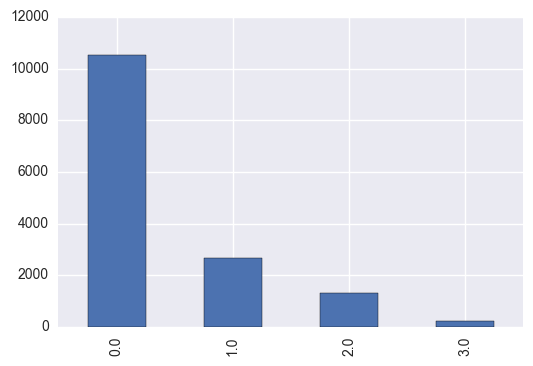

In [23]:
# See the distribution of historical categories
redlistdf_dropna.history_category.value_counts().plot(kind='bar')

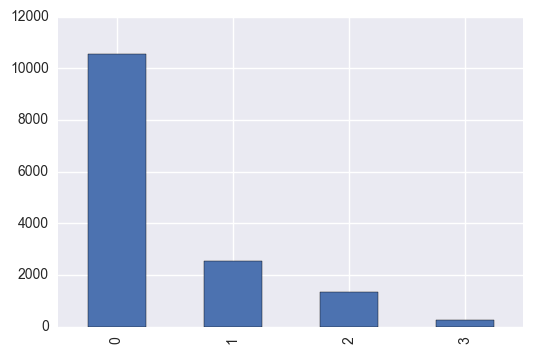

In [24]:
# See the distribution of current categories
redlistdf_dropna.curr_category.value_counts().plot(kind='bar')

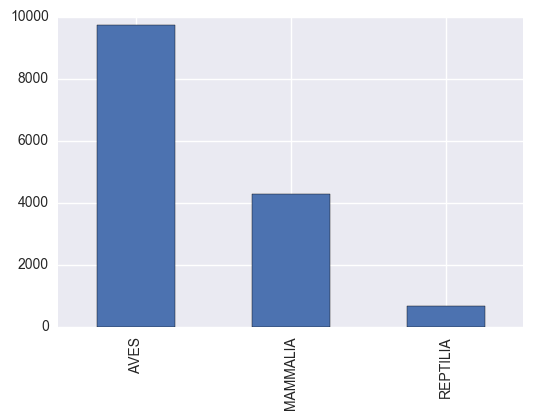

In [25]:
redlistdf_dropna.taxon_class.value_counts().plot(kind='bar')

In [333]:
# load country population data
pop_df = pd.read_csv('country_pop.csv')
country_pop_df_nona = pop_df.dropna()
country_pop_df_nona.loc[country_pop_df_nona['Country Name'].str.contains('Romania'), 'Country Code'] = 'ROU'
country_pop_df = country_pop_df_nona.set_index('Country Code')

In [334]:
# load forest area data
forestdf = pd.read_csv('FAOSTAT_data_2-14-2017.csv')
forestdf_fillna = forestdf.fillna(method='ffill')

In [335]:
# SET NAMIBIA TO NA from MM
forestdf_fillna.loc[forestdf_fillna['Country']=='Namibia', 'Country Code'] = 'NA'

In [336]:
# fill missing values with values from previous/next year for continuity 
forest_by_country = forestdf_fillna.pivot(index='Country Code', columns='Year')['Value']
forest_by_contry_clean = forest_by_country.fillna(method='ffill', axis=1)
forest_by_contry_clean = forest_by_country.fillna(method='bfill', axis=1)

In [ ]:
# Using google bigquery weather data
### SQL for https://bigquery.cloud.google.com/results/helpful-compass-158700:bquijob_1474c3eb_15a3a642d7e
SELECT AVG(temp), country, year
FROM (  
  SELECT year, stn, wban, temp 
  FROM TABLE_QUERY([bigquery-public-data:noaa_gsod], 'table_id CONTAINS "gsod"')) a
JOIN [bigquery-public-data:noaa_gsod.stations] b
ON a.stn=b.usaf AND a.wban=b.wban
WHERE year > '1993'
GROUP BY country, year
ORDER BY country, year

In [337]:
# load csv from the SQL query
temp_countrydf = pd.read_csv('GlobalLandTemperaturesByCountry.csv')
years = pd.to_datetime(temp_countrydf.dt)
temp_countrydf['year']=map(lambda x: x.year, years)
temp_country_ffill = temp_countrydf.fillna(method='ffill')
temp_country_by_year = temp_country_ffill.groupby(['year', 'Country']).mean().reset_index()
temp_country_pivot = temp_country_by_year.pivot(index='Country', columns='year')['AverageTemperature']

In [338]:
temp_contry_clean = temp_country_pivot.fillna(method='ffill', axis=1)
temp_contry_clean = temp_country_pivot.fillna(method='bfill', axis=1)

In [339]:
# Add all the country codes to allow for syncing across different datasets
country_codes= pd.read_table('countrycodeinfo.txt',comment='#')
country_code_conv = country_codes[['ISO', 'ISO3', 'fips', 'Country']]
country_code_conv.loc[country_code_conv.Country.str.contains('Namibia'), 'ISO'] = 'NA'
iso_index_country_code_conv = country_code_conv.set_index('ISO')

/Users/James/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [340]:
google_temp_country = pd.read_csv('country_temp_avg.csv')
google_temp_country.fillna(method='ffill')
google_temp_country_pivot = google_temp_country.pivot(index='country', columns='year')['f0_']

In [341]:
google_temp_contry_clean = google_temp_country_pivot.fillna(method='ffill', axis=1)
google_temp_contry_clean = google_temp_country_pivot.fillna(method='bfill', axis=1)

In [342]:
redlist_country_code1 = pickle.load( open( "redlistcountrycode.p", "rb" ) )
redlist_country_code2 = pickle.load( open( "redlistcountrycode2.p", "rb" ) )
redlist_country_code3 = pickle.load( open( "redlistcountrycode3.p", "rb" ) )

In [343]:
redlist_country_codes = redlist_country_code1+redlist_country_code2+redlist_country_code3

In [344]:
country_code_df = pd.DataFrame(redlist_country_codes)
species_country_df = country_code_df.set_index('species_id')

In [373]:
pickle.dump(species_country_df, open( "countrydf.p", "wb+" ))

In [108]:
# combine the environmental data with the species data
percent_data = []
fail_dict = {}
pop_col = '{} [YR{}]'
headers = ['species_id', 'forrest_mean', 'temp_mean', 'pop_mean', 'country_count']
for i in range(len(redlistdf_dropna)):
    curr_id = redlistdf_dropna.iloc[i].species_id
    curr_year = redlistdf_dropna.iloc[i].year_num
    history_year = redlistdf_dropna.iloc[i].hist_year_num
    curr_country_list = species_country_df.loc[curr_id].country_array
    country_count = species_country_df.loc[curr_id].country_count
    forest_array = []
    temp_array = []
    pop_array = []
    for country in curr_country_list:
        if country == 'HK' or country == 'TW' or country=='MO':
            country = 'CN'
            
        if country == 'PS':
            country = 'IL'
        
        if country == 'CX' or country == 'CC':
            country = 'AU'
            
        fip_code = iso_index_country_code_conv.loc[country].fips
        iso3_dig = iso_index_country_code_conv.loc[country].ISO3
        
        if curr_year == 2016:
            for_curr_year = 2015
        else:
            for_curr_year = curr_year
        try:
            forest_country = forest_by_contry_clean.loc[country]
            forest_perc_change = (forest_country.loc[for_curr_year] - forest_country.loc[history_year])/ forest_country.loc[history_year]
            forest_array.append(forest_perc_change)
        except:
            if country not in fail_dict:
                fail_dict[country] = 1

            forest_array.append(np.nan)
        
        try:
            temp_country = google_temp_contry_clean.loc[fip_code]
            temp_perc_change = (temp_country.loc[curr_year] - temp_country.loc[history_year])/ temp_country.loc[history_year]
            temp_array.append(temp_perc_change)
        except:

            temp_array.append(np.nan)
            
        try:
            pop_country = country_pop_df.loc[iso3_dig]
            pop_perc_change = (float(pop_country.loc[pop_col.format(for_curr_year, for_curr_year)]) - float(pop_country.loc[pop_col.format(history_year, history_year)]))/ float(pop_country.loc[pop_col.format(history_year, history_year)])
            pop_array.append(pop_perc_change)
        except:

            pop_array.append(np.nan)        
    
    percent_dict = dict(zip(headers, [curr_id,
                                    np.nanmean(forest_array),
                                    np.nanmean(temp_array),
                                    np.nanmean(pop_array),
                                    country_count])) 
    percent_data.append(percent_dict)

    with open('habitat_percentages.txt','a') as efile:
        efile.write('{}: {}'.format(i, curr_id))    
        

In [110]:
percentdf = pd.DataFrame(percent_data)
percent_df_final = percentdf.dropna()

In [115]:
pickle.dump(percent_df_final, open( "percentdf.p", "wb+" ))

In [352]:
redlistdf_dropna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14698 entries, 0 to 14697
Data columns (total 23 columns):
curr_category       14698 non-null int64
curr_code           14698 non-null object
curr_year           14698 non-null object
habitat             14698 non-null object
history_category    14698 non-null float64
history_code        14698 non-null object
history_year        14698 non-null object
species_id          14698 non-null int64
taxon_class         14698 non-null object
1                   14698 non-null float64
2                   14698 non-null float64
3                   14698 non-null float64
4                   14698 non-null float64
5                   14698 non-null float64
6                   14698 non-null float64
7                   14698 non-null float64
8                   14698 non-null float64
9                   14698 non-null float64
AVES                14698 non-null float64
MAMMALIA            14698 non-null float64
REPTILIA            14698 non-null float6

In [306]:
redlistdf_dropna.ix[:, 9:21]

,1,2,3,4,5,6,7,8,9,AVES,MAMMALIA,REPTILIA
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [356]:
redlist_feat = pd.concat([redlistdf_dropna.ix[:, 9:21], redlistdf_dropna[['history_category', 'species_id','curr_code', 'history_code', 'curr_category']]], axis=1)
model_data=percent_df_final.set_index('species_id').join(redlist_feat.set_index('species_id'), how = 'left')

In [358]:
model_data.head()

,country_count,forrest_mean,pop_mean,temp_mean,1,2,3,4,5,6,7,8,9,AVES,MAMMALIA,REPTILIA,history_category,curr_code,history_code,curr_category
species_id,,,,,,,,,,,,,,,,,,,,
22687170,5,-0.030843,0.038309,0.019611,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,LC,LC,0
17879,1,-0.000572,0.164986,0.009266,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,LC,LC,0
61450,4,0.017595,0.051593,0.024931,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,LC,LC,0
29691,10,0.017198,-0.006011,0.026995,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,LC,LC,0
42656,1,0.097775,0.078229,-0.017872,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,LC,LC,0


In [359]:
X=model_data.iloc[:, :-3]
y=model_data.iloc[:, -1]
y_cat = model_data.iloc[:,-3].astype('category')

In [364]:
hist_cat = model_data.iloc[:,-2].astype('category')

In [309]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14595 entries, 22687170 to 23328
Data columns (total 17 columns):
country_count       14595 non-null int64
forrest_mean        14595 non-null float64
pop_mean            14595 non-null float64
temp_mean           14595 non-null float64
1                   14595 non-null float64
2                   14595 non-null float64
3                   14595 non-null float64
4                   14595 non-null float64
5                   14595 non-null float64
6                   14595 non-null float64
7                   14595 non-null float64
8                   14595 non-null float64
9                   14595 non-null float64
AVES                14595 non-null float64
MAMMALIA            14595 non-null float64
REPTILIA            14595 non-null float64
history_category    14595 non-null float64
dtypes: float64(16), int64(1)
memory usage: 2.0 MB


In [324]:
y_diff = model_data.curr_category - model_data.history_category
y_change = y_diff != 0

In [360]:
pickle.dump(model_data, open( "model_data.p", "wb+" ))
pickle.dump(X, open( "X_features.p", "wb+" ))
pickle.dump(y, open( "y_label.p", "wb+" ))
pickle.dump(y_diff, open( "y_diff.p", "wb+" ))
pickle.dump(y_change, open( "y_change.p", "wb+" ))


In [365]:
pickle.dump(y_cat, open( "y_cat.p", "wb+" ))
pickle.dump(hist_cat, open( "hist_cat.p", "wb+" ))